In [1]:
import matplotlib.pyplot as plt
import scipy

In [2]:
results = {
    1: {'N': [], 'sum': [], 'time': []},
    2: {'N': [], 'sum': [], 'time': []},
    3: {'N': [], 'sum': [], 'time': []},
    4: {'N': [], 'sum': [], 'time': []},
}

with open("results.txt") as res_file:
    num_threads = 1
    for line in res_file:
        line = line.strip().split(':')
        
        if len(line) == 0:
            continue
        
        if line[0].startswith("THREADS"):
            num_threads = int(line[1])
        elif line[0].startswith("N"):
            results[num_threads]["N"].append(int(line[1]))
        elif line[0].startswith("sum"):
            results[num_threads]["sum"].append(float(line[1]))
        elif line[0].startswith("time"):
            results[num_threads]["time"].append(float(line[1]))

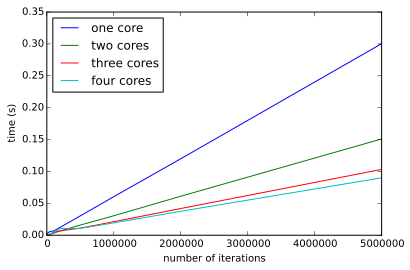

In [3]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.set_xlabel("number of iterations")
axes.set_ylabel("time (s)")

axes.plot(results[1]["N"], results[1]["time"], label="one core")
axes.plot(results[2]["N"], results[2]["time"], label="two cores")
axes.plot(results[3]["N"], results[3]["time"], label="three cores")
axes.plot(results[4]["N"], results[4]["time"], label="four cores")

axes.legend(loc="best")
fig.savefig('linear.pdf')

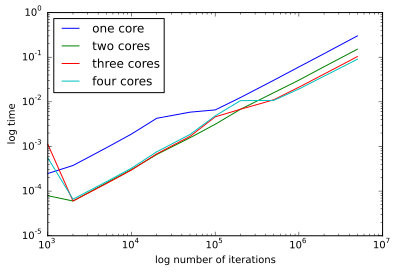

In [4]:
logfig = plt.figure()
logaxes = logfig.add_subplot(1, 1, 1)
logaxes.set_xlabel("log number of iterations")
logaxes.set_ylabel("log time")

logaxes.loglog(results[1]["N"], results[1]["time"], label="one core")
logaxes.loglog(results[2]["N"], results[2]["time"], label="two cores")
logaxes.loglog(results[3]["N"], results[3]["time"], label="three cores")
logaxes.loglog(results[4]["N"], results[4]["time"], label="four cores")

logaxes.legend(loc="best")
logfig.savefig('log.pdf')

In [5]:
with open("results_table.txt", "w") as f:
    print("N\tt1\tt2\tt3\tt4", file=f)
    for (n, t1, t2, t3, t4) in zip(results[1]["N"], results[1]["time"], results[2]["time"], results[3]["time"], results[4]["time"]):
        print(n, t1, t2, t3, t4, sep='\t', file=f)